# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

Se cargan las librerias pandas, math, matplot, numpy, seaborn y scipy para poder acceder y procesar los datos para obtener los estadisticos, así como poder graficar la información.

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sta 
from scipy import stats as st
from scipy.stats import iqr
from math import factorial
from matplotlib import pyplot as plt

print (pd)


<module 'pandas' from '/opt/conda/lib/python3.9/site-packages/pandas/__init__.py'>


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet= pd.read_csv('/datasets/megaline_internet.csv')
df_plans= pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

Se muestra cada una de las bases de datos para corroborar que han sido importadas correctamente y se puede trabajar con ellas.

In [3]:
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [4]:
display (df_calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [5]:
display(df_messages)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [6]:
display (df_internet)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [7]:
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Tarifas

Se muestra la información general del DF 'df_plans' para conocer que tipo de datos son y si es necesario realizar algún cambio.

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


No se observan datos ausentes o inconsistencias en el dataframe por lo que no es necesario hacer correcciones pero sí enriquecer los datos.

### Corregir datos

No hay correcciones que hacer a los datos

### Enriquecer los datos

Se agrega la columna 'gb_per_month_included' que contiene el valor de datos incluidos en cada uno de los planes.

In [10]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Usuarios/as

Se muestra la información general del DF 'df_users' para conocer qué tipo de datos son y si es necesario realizar algún cambio, se verifica la existencia de valores duplicados y ausentes y se obtiene información estadística descriptiva general.

In [11]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
# Busqueda de duplicados.
df_users.duplicated().sum()

0

In [13]:
# Imprime una muestra de datos para usuarios
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [14]:
#Información estadística general
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


En el desplegado de información general se ve que la columna "churn_date" muestra valores ausentes que nos indica que esos usuarios aun cuentan con el servicio activo, estos valores se reemplazaran con 'Active' para evitar problemas posteriores con el procesamiento de datos.

La columna 'reg_date' esta en formato 'object' por lo que se debe convertir a formato de fecha.


### Corregir los datos

In [15]:
#Cambio de formato 'object' a 'datetime' de la información de la columna 'reg_date'.
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

### Enriquecer los datos

In [16]:
#Conteo de valoeres ausentes
print(df_users.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [17]:
#Cambio de valores ausentes en la columna 'churn_date' por 'Active' 
churn_date=df_users['churn_date'].fillna('Active', inplace = True)

In [18]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


## Llamadas

Se muestra la información general del DF 'df_calls' para conocer qué tipo de datos son y si es necesario realizar algún cambio, se verifica la existencia de valores duplicados y ausentes y se obtiene información estadística descriptiva general.

In [19]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [20]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(20)

,id,user_id,call_date,duration
88024,1324_65,1324,2018-10-07,17.97
91538,1329_592,1329,2018-11-26,8.53
22842,1083_15,1083,2018-11-03,2.85
71205,1253_51,1253,2018-12-29,11.00
8647,1041_82,1041,2018-09-16,14.94
38278,1144_165,1144,2018-05-08,1.50
108118,1382_1237,1382,2018-12-02,5.39
78537,1281_141,1281,2018-09-26,21.49
36288,1138_242,1138,2018-07-09,0.00
97459,1347_285,1347,2018-12-17,6.56


In [21]:
# Revisión de duplicados
df_calls.duplicated().sum()

0

In [22]:
#Información estadística general
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


Se observa que la información referente a las llamadas esta completa, sin embargo, los formatos en  que se encuentran los datos no son los ideales para su manejo. 

Se cambia el formato de los datos de la fecha de las llamadas a 'datetime' para poder crear una nueva columna que indique el mes ('month') en que se realizan las llamadas, esto se requerira para la determinación de tarifas.

Se  agrega una columna al dataframe con la duración de las llamadas redondeadas ('duration_roundup'), ya que así es como la compañia determina la tarifa adicional que se le aplicará al cliente, en caso necesario.


### Corregir los datos

In [23]:
# Cambio del tipo de dato a 'datetime'
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Se aplica .ceil() para redondear hacia arriba la duración de las llamadas.

In [24]:
# Adición de la columna 'duration_roundup' que contiene la duración redondeada de las llamadas.
df_calls['duration_roundup']=np.ceil(df_calls['duration'])
display(df_calls)

,id,user_id,call_date,duration,duration_roundup
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0
137731,1499_200,1499,2018-10-20,10.89,11.0
137732,1499_201,1499,2018-09-21,8.12,9.0
137733,1499_202,1499,2018-10-10,0.37,1.0


Se adiciona la columna 'month', la cual contiene el mes en que se realizó la llamada.

In [25]:
# Se agrega la columna 'month'.
df_calls['month'] =df_calls['call_date'].dt.month
display(df_calls)

,id,user_id,call_date,duration,duration_roundup,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0,11
137731,1499_200,1499,2018-10-20,10.89,11.0,10
137732,1499_201,1499,2018-09-21,8.12,9.0,9
137733,1499_202,1499,2018-10-10,0.37,1.0,10


In [26]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  object        
 1   user_id           137735 non-null  int64         
 2   call_date         137735 non-null  datetime64[ns]
 3   duration          137735 non-null  float64       
 4   duration_roundup  137735 non-null  float64       
 5   month             137735 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 6.3+ MB


## Mensajes

Se muestra la información general del DF 'df_messages' para conocer qué tipo de datos son y si es necesario realizar algún cambio, se verifica la existencia de valores duplicados y ausentes y se obtiene información estadística descriptiva general.

In [27]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
# Imprime una muestra de datos para los mensajes
df_messages.sample(10)

,id,user_id,message_date
70393,1458_22,1458,2018-10-22
32344,1201_37,1201,2018-10-14
48108,1324_839,1324,2018-09-21
39330,1255_553,1255,2018-08-18
37497,1248_61,1248,2018-12-22
53605,1340_131,1340,2018-10-19
14750,1100_72,1100,2018-09-06
9909,1075_164,1075,2018-11-09
56518,1357_147,1357,2018-09-05
25042,1148_13,1148,2018-11-09


In [29]:
# Comprobación de duplicados
df_messages.duplicated().sum()

0

In [30]:
# Información estadística general
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


Se observa que la información referente a los mensajes esta completa. 

El formato de la columna 'message_date' se cambia por 'datetime' y se agrega la columna 'month' que contiene el mes en que se envia el mensaje.

### Corregir los datos

In [31]:
# Cambio de Dtype en columna 'message_date' por 'datetime'
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [32]:
# Adición de columna 'month' en el dataframe
df_messages['month'] =df_messages['message_date'].dt.month
display(df_messages.sample(10))

,id,user_id,message_date,month
57467,1362_554,1362,2018-12-14,12
7787,1060_123,1060,2018-10-30,10
39178,1255_216,1255,2018-08-04,8
68730,1444_213,1444,2018-09-10,9
74516,1478_44,1478,2018-12-29,12
69630,1453_78,1453,2018-12-24,12
74365,1476_130,1476,2018-10-17,10
69161,1448_390,1448,2018-11-06,11
4343,1043_547,1043,2018-08-14,8
48175,1324_907,1324,2018-06-23,6


In [33]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


## Internet

Se muestra la información general del DF 'df_internet' para conocer qué tipo de datos son y si es necesario realizar algún cambio, se verifica la existencia de valores duplicados y ausentes y se obtiene información estadística descriptiva general.

In [34]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [35]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(15)

,id,user_id,session_date,mb_used
44100,1196_102,1196,2018-04-11,291.01
2665,1011_405,1011,2018-11-30,528.40
15789,1071_442,1071,2018-11-30,0.00
44960,1199_238,1199,2018-08-05,565.44
488,1004_82,1004,2018-08-12,376.15
20497,1095_161,1095,2018-06-06,0.00
59658,1268_327,1268,2018-05-19,179.84
23440,1109_18,1109,2018-12-18,355.25
22054,1100_258,1100,2018-11-18,799.32
77085,1361_114,1361,2018-06-06,59.69


In [36]:
# Comprobación de duplicados
df_internet.duplicated().sum()

0

In [37]:
#Información estadística general
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


Se observa que la información referente a la duración en internet esta completa, sin embargo los formatos en los que se encuentran los datos no son los ideales para su manejo. 

Se  agrega una columna al dataframe con la duración de las sesiones de internet convertidas a gb ya que así es como la compañia determina la tarifa adicional que se le aplicará al cliente, en caso necesario.

Se convierte a 'datetime' la columna de la fecha y se agrega la coluna 'month' que contiene el mes en que se ralizo la sesión.

### Corregir los datos

In [38]:
# Cambio de Dtype en columna 'session_date' por 'datetime'
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

In [39]:
# Adición de columnas 'month' y 'gb_used'
df_internet['month'] =df_internet['session_date'].dt.month
df_internet['gb_used'] = df_internet['mb_used'] / 1024
display(df_internet)

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,0.212949
104821,1499_216,1499,2018-12-30,304.72,12,0.297578
104822,1499_217,1499,2018-09-22,292.75,9,0.285889
104823,1499_218,1499,2018-12-07,0.00,12,0.000000


In [40]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
 5   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.8+ MB


## Estudiar las condiciones de las tarifas

In [41]:
# Impresión de las condiciones de la tarifa.
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario


Se agrupan cada uno de los dataframes por usuario y mes, los resultados se guardan en nuevas bases de datos para su posterior uso.

Se usa:

    .grupby() para agrupar, 
    
    .sum() para conocer el tiempo de las llamadas y los datos consumidos y 
    
    .count() para saber el numero de llamadas y mensajes usados.
    
Se compilan las bases de datos en un nuevo dataframe que muestra lo que cada usuario consumio por mes. Se calculan las tarifas de cada usurio añadiendo la informacion de ellos y de los planes, así como realizando los calculos para esto, se añaden las columnas de consumos adicionales correspondientes.


In [42]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_grp = df_calls.groupby(['user_id', 'month']).count().reset_index()
calls_grp

,user_id,month,id,call_date,duration,duration_roundup
0,1000,12,16,16,16,16
1,1001,8,27,27,27,27
2,1001,9,49,49,49,49
3,1001,10,65,65,65,65
4,1001,11,64,64,64,64
...,...,...,...,...,...,...
2253,1498,12,39,39,39,39
2254,1499,9,41,41,41,41
2255,1499,10,53,53,53,53
2256,1499,11,45,45,45,45


In [43]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls_min_grp = df_calls.groupby(by=['user_id', 'month']).sum().reset_index()
calls_min_grp

,user_id,month,duration,duration_roundup
0,1000,12,116.83,124.0
1,1001,8,171.14,182.0
2,1001,9,297.69,315.0
3,1001,10,374.11,393.0
4,1001,11,404.59,426.0
...,...,...,...,...
2253,1498,12,324.77,339.0
2254,1499,9,330.37,346.0
2255,1499,10,363.28,385.0
2256,1499,11,288.56,308.0


In [44]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_grp = df_messages.groupby(by=['user_id', 'month']).count().reset_index()
messages_grp

,user_id,month,id,message_date
0,1000,12,11,11
1,1001,8,30,30
2,1001,9,44,44
3,1001,10,53,53
4,1001,11,36,36
...,...,...,...,...
1801,1496,9,21,21
1802,1496,10,18,18
1803,1496,11,13,13
1804,1496,12,11,11


Se agrupa la informción del consumo de internet por usuario y se aplica .ceil() para redondear los gb consumidos por cada usuario en cada periodo.

In [45]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_grp = df_internet.groupby(by=['user_id', 'month']).sum().reset_index()
internet_grp['mb_used_roundup']=np.ceil(internet_grp['mb_used'])
internet_grp['gb_used_rup'] = np.ceil (internet_grp['mb_used_roundup'] / 1024)

internet_grp

,user_id,month,mb_used,gb_used,mb_used_roundup,gb_used_rup
0,1000,12,1901.47,1.856904,1902.0,2.0
1,1001,8,6919.15,6.756982,6920.0,7.0
2,1001,9,13314.82,13.002754,13315.0,14.0
3,1001,10,22330.49,21.807119,22331.0,22.0
4,1001,11,18504.30,18.070605,18505.0,19.0
...,...,...,...,...,...,...
2272,1498,12,23137.69,22.595400,23138.0,23.0
2273,1499,9,12984.76,12.680430,12985.0,13.0
2274,1499,10,19492.43,19.035576,19493.0,20.0
2275,1499,11,16813.83,16.419756,16814.0,17.0


Compilación de los datos para registrar el consumo de cada usurio por mes

In [46]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
mrg_calls = calls_grp.merge(calls_min_grp, how='outer', on=['user_id' , 'month'])
mrg_msn = mrg_calls.merge(messages_grp, how='outer', on=['user_id' , 'month'])
mrg_mbs = mrg_msn.merge(internet_grp, how='outer', on=['user_id' , 'month']).reset_index(drop=True)
df_comp = mrg_mbs[['user_id' , 'month', 'id_x', 'duration_y', 'duration_roundup_y', 'id_y', 'mb_used', 'gb_used_rup']]
df_comp.columns = ['user_id' , 'month', 'llamadas', 'minutos', 'min_roundup', 'mensajes', 'mb_used', 'gb_used_rup']
display(df_comp)


,user_id,month,llamadas,minutos,min_roundup,mensajes,mb_used,gb_used_rup
0,1000,12,16.0,116.83,124.0,11.0,1901.47,2.0
1,1001,8,27.0,171.14,182.0,30.0,6919.15,7.0
2,1001,9,49.0,297.69,315.0,44.0,13314.82,14.0
3,1001,10,65.0,374.11,393.0,53.0,22330.49,22.0
4,1001,11,64.0,404.59,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,NaN,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,NaN,233.17,1.0


Se usa fillna(0) en las columnas 'llamadas', 'minutos', 'mensajes', 'min_roundup', 'mb_used', 'gb_used_rup' para poder realizar el calculo del consumo por cada usuario.

In [47]:
# Añade la información de la tarifa
mrg_user = df_comp.merge(df_users, how = 'outer', on = 'user_id')
mrg_tar = mrg_user.merge(df_plans, how = 'outer', left_on = 'plan', right_on = 'plan_name')

columns_to_replace = ['llamadas', 'minutos', 'mensajes', 'min_roundup', 'mb_used', 'gb_used_rup']
for col in columns_to_replace:
  mrg_tar[col].fillna(0, inplace=True)

print(mrg_tar[['user_id' , 'month', 'llamadas', 'minutos', 'min_roundup', 'mensajes', 'gb_used_rup', 'plan', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name']])


      user_id  month  llamadas  minutos  min_roundup  mensajes  gb_used_rup  \
0        1000   12.0      16.0   116.83        124.0      11.0          2.0   
1        1006   11.0       2.0     9.32         10.0      15.0          3.0   
2        1006   12.0       9.0    54.79         59.0     139.0         32.0   
3        1008   10.0      71.0   450.21        476.0      21.0         17.0   
4        1008   11.0      63.0   422.81        446.0      37.0         24.0   
...       ...    ...       ...      ...          ...       ...          ...   
2298     1143    NaN       0.0     0.00          0.0       0.0          0.0   
2299     1307    NaN       0.0     0.00          0.0       0.0          0.0   
2300     1319    NaN       0.0     0.00          0.0       0.0          0.0   
2301     1378    NaN       0.0     0.00          0.0       0.0          0.0   
2302     1473    NaN       0.0     0.00          0.0       0.0          0.0   

          plan  messages_included  mb_per_month_inc

Calculo de los ingresos mensuales por usurio:

    Se restan el consumo del usuario del limite que ofrece el plan,
    
    Se asigna el valor mínimo en 0,
    
    Se multiplica el consumo excedente por la tarifa correspondiente,
    
    Se suma a la tarifa base los consumos adicionales que se hayan realizado.

In [48]:
# Calcula el ingreso mensual para cada usuario
mrg_tar['min_ex'] = np.maximum (mrg_tar['minutos'] - mrg_tar['minutes_included'], 0)
mrg_tar['msn_ex'] = np.maximum (mrg_tar['mensajes'] - mrg_tar['messages_included'], 0)
mrg_tar['int_ex'] = np.maximum (mrg_tar['mb_used'] - mrg_tar['mb_per_month_included'], 0)
mrg_tar['conv_gb'] = np.ceil (mrg_tar['int_ex'] / 1024)
mrg_tar['cal_min'] = mrg_tar['min_ex'] * mrg_tar['usd_per_minute']
mrg_tar['cal_msn'] = mrg_tar['msn_ex'] * mrg_tar['usd_per_message']
mrg_tar['cal_int'] = mrg_tar['conv_gb'] * mrg_tar['usd_per_gb']
mrg_tar['usd_tar'] = mrg_tar['usd_monthly_pay'] + mrg_tar['cal_min'] + mrg_tar['cal_msn'] + mrg_tar['cal_int']


print(mrg_tar)


      user_id  month  llamadas  minutos  min_roundup  mensajes   mb_used  \
0        1000   12.0      16.0   116.83        124.0      11.0   1901.47   
1        1006   11.0       2.0     9.32         10.0      15.0   2068.37   
2        1006   12.0       9.0    54.79         59.0     139.0  32118.82   
3        1008   10.0      71.0   450.21        476.0      21.0  17106.99   
4        1008   11.0      63.0   422.81        446.0      37.0  23676.72   
...       ...    ...       ...      ...          ...       ...       ...   
2298     1143    NaN       0.0     0.00          0.0       0.0      0.00   
2299     1307    NaN       0.0     0.00          0.0       0.0      0.00   
2300     1319    NaN       0.0     0.00          0.0       0.0      0.00   
2301     1378    NaN       0.0     0.00          0.0       0.0      0.00   
2302     1473    NaN       0.0     0.00          0.0       0.0      0.00   

      gb_used_rup  first_name last_name  ...  plan_name gb_per_month_included  \
0     

In [49]:
display(mrg_tar[['user_id', 'month', 'llamadas', 'minutos', 'min_roundup', 'mensajes', 'mb_used', 'gb_used_rup', 'plan_name', 'usd_tar']].sample(20))


,user_id,month,llamadas,minutos,min_roundup,mensajes,mb_used,gb_used_rup,plan_name,usd_tar
1968,1385,8.0,54.0,282.40,298.0,36.0,15329.76,15.0,surf,20.0000
2262,1498,9.0,45.0,344.62,363.0,0.0,22827.28,23.0,surf,100.0000
841,1048,12.0,24.0,152.18,163.0,0.0,9290.36,10.0,surf,20.0000
1602,1280,8.0,54.0,334.02,354.0,65.0,10897.62,11.0,surf,20.4500
1190,1147,5.0,107.0,713.59,759.0,24.0,28739.36,29.0,surf,166.4077
1184,1145,10.0,54.0,319.89,343.0,71.0,23605.38,24.0,surf,110.6300
403,1273,12.0,56.0,399.98,424.0,52.0,18176.59,18.0,ultimate,70.0000
1329,1187,4.0,78.0,534.33,568.0,7.0,14572.78,15.0,surf,21.0299
2275,1089,12.0,0.0,0.00,0.0,27.0,16597.91,17.0,surf,40.0000
230,1155,12.0,29.0,203.08,217.0,35.0,26530.44,26.0,ultimate,70.0000


Se agrupan cada uno de los dataframes por usuario y mes, los resultados se guardan en nuevas bases de datos. Se determinan los tiempo de llamadas, el numero mensajes enviados y el consumo de datos de internet.

Se compilan las bases de datos en un nuevo dataframe que muestra lo que cada usuario consumio por mes. 

Se calculan las tarifas de cada usurio añadiendo la informacion de los planes que cada usuario contrato, se añaden las columnas de consumos adicionales correspondientes, se realizan los calculos para determinar el ingreso.


A primera vista, se observa que los consumos de los usuarios no estan limitados por el plan que contrataron y hay algunos a los que se les podría sugerir el cambio de plan ya sea porque usan mas de los que ofrece el plan que tienen o porque su consumo es menor.

## Estudia el comportamiento de usuario

Se calculan los promedios, medias y varianzas mensuales de cada plan para cada servicio (tiempo de llamadas, numero de mensajes y consumo de internet), se grafican los resultados mediante gráficos de barras, histograma -dispersión- y boxplot (dependiendo del caso).

### Llamadas

plan,surf,ultimate
month,,
1.0,203.000000,193.500000
2.0,297.000000,403.142857
3.0,330.000000,304.250000
4.0,351.540000,336.857143
5.0,399.584416,406.241379
6.0,431.298969,370.957447
7.0,449.983471,427.067797
8.0,410.111111,421.436620
9.0,414.226804,437.511628


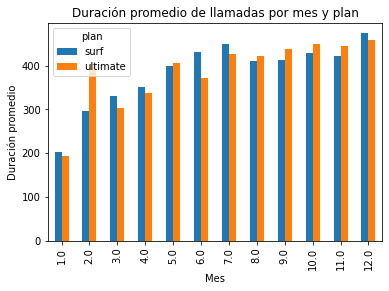

In [50]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_calls_duration_avg = mrg_tar.pivot_table(index = 'month', 
                                                   columns = 'plan',
                                                   values = 'min_roundup',
                                                   aggfunc = 'mean')
display (df_calls_duration_avg)

df_calls_duration_avg.plot(kind='bar', 
                           title = 'Duración promedio de llamadas por mes y plan', 
                           xlabel = 'Mes', 
                           ylabel = 'Duración promedio'
                          )
plt.show()


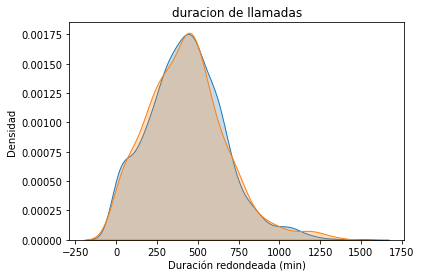

In [51]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_calls_dur_month_surf = mrg_tar [mrg_tar['plan']=='surf']['min_roundup'].reset_index(drop=True)
sns.kdeplot(df_calls_dur_month_surf, shade = True)

df_calls_dur_month_ultimate = mrg_tar [mrg_tar['plan']=='ultimate']['min_roundup'].reset_index(drop=True)
sns.kdeplot(df_calls_dur_month_ultimate, shade = True)

plt.title  ('duracion de llamadas')
plt.xlabel  ('Duración redondeada (min)')
plt.ylabel ('Densidad')
plt.legend = (['surf', 'ultimate'])

In [52]:
# Cálculo de estadísticos de la duración mensual de llamadas en el plan surf.

print ('La media de la duración mensual de llamadas del plan surf:', df_calls_dur_month_surf.mean())
print('La mediana de la duración mensual de llamadas del plan surf es igual a', df_calls_dur_month_surf.median())
print('La moda de la duración mensual de llamadas del plan surf es igual a',sta.mode(df_calls_dur_month_surf))
print ('La varianza de la duración mensual de llamadas del plan surf:', np.var(df_calls_dur_month_surf))
print('La desviación estandar de la duración mensual de llamadas del plan surf es igual a', np.std(df_calls_dur_month_surf))


La media de la duración mensual de llamadas del plan surf: 427.12032932235593
La mediana de la duración mensual de llamadas del plan surf es igual a 424.0
La moda de la duración mensual de llamadas del plan surf es igual a 0.0
La varianza de la duración mensual de llamadas del plan surf: 55420.45670514804
La desviación estandar de la duración mensual de llamadas del plan surf es igual a 235.4154980139329


In [53]:
# Cálculo de estadísticos de la duración mensual de llamadas en el plan ultimate.

print ('La media de la duración mensual de llamadas del plan ultimate:', df_calls_dur_month_ultimate.mean())
print('La mediana de la duración mensual de llamadas del plan ultimate es igual a', df_calls_dur_month_ultimate.median())
print('La moda de la duración mensual de llamadas del plan ultimate es igual a', sta.mode(df_calls_dur_month_ultimate))
print ('La varianza de la duración mensual de llamadas del plan ultimate:', np.var(df_calls_dur_month_ultimate))
print('La desviación estandar de la duración mensual de llamadas del plan ultimate es igual a', np.std(df_calls_dur_month_ultimate))


La media de la duración mensual de llamadas del plan ultimate: 428.0718232044199
La mediana de la duración mensual de llamadas del plan ultimate es igual a 421.5
La moda de la duración mensual de llamadas del plan ultimate es igual a 0.0
La varianza de la duración mensual de llamadas del plan ultimate: 58463.016940874826
La desviación estandar de la duración mensual de llamadas del plan ultimate es igual a 241.7912672965565


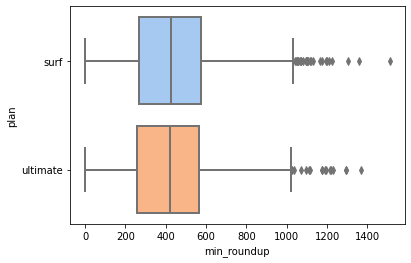

count    1579.000000
mean      427.120329
std       235.490079
min         0.000000
25%       269.000000
50%       424.000000
75%       576.000000
max      1510.000000
Name: min_roundup, dtype: float64

count     724.000000
mean      428.071823
std       241.958423
min         0.000000
25%       258.750000
50%       421.500000
75%       564.250000
max      1369.000000
Name: min_roundup, dtype: float64

In [54]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(x = 'min_roundup', y ='plan', data = mrg_tar, order = ['surf', 'ultimate'], palette= 'pastel', saturation = 0.9, fliersize = 5 , linewidth = 2)

plt.show()

display(df_calls_dur_month_surf.describe())

display(df_calls_dur_month_ultimate.describe())

In [55]:
#Calculo del rango intercuartil para la duración promedio de las llamadas en el plan surf.
q1 = np.percentile(df_calls_dur_month_surf, 25)
q3 = np.percentile(df_calls_dur_month_surf, 75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)
print (' Atipico inferior', (q1 - 1.5 * iqr))
print (' Atipico superior', (q3 + 1.5 * iqr))

Interquartile Range (IQR): 307.0
 Atipico inferior -191.5
 Atipico superior 1036.5


In [56]:
#Calculo del rango intercuartil para la duración promedio de las llamadas en el plan ultimate.
q1 = np.percentile(df_calls_dur_month_ultimate, 25)
q3 = np.percentile(df_calls_dur_month_ultimate, 75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

print (' Atipico inferior', (q1 - 1.5 * iqr))
print (' Atipico superior', (q3 + 1.5 * iqr))

Interquartile Range (IQR): 305.5
 Atipico inferior -199.5
 Atipico superior 1022.5


La duración promedio de las llamadas no muestra diferencia entre los planes surf y ultimate.

Para el plan surf los valores atipicos se presentan en duraciones mayores a 1036 minutos, y en el plan ultimate estos se presentan en duraciones mayores a 1022.5 minutos. En ambos casos los valores los valoeres atipicos minimos son menores a 0, lo cual no es posible.


### Mensajes

plan,surf,ultimate
month,,
1.0,10.500000,15.500000
2.0,12.000000,21.571429
3.0,15.260870,20.250000
4.0,17.400000,22.047619
5.0,24.012987,32.103448
6.0,25.298969,29.340426
7.0,27.033058,32.830508
8.0,28.777778,38.478873
9.0,30.762887,37.895349


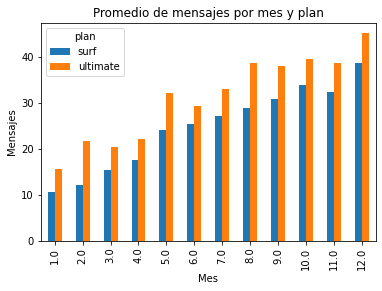

In [57]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

df_menssages_avg = mrg_tar.pivot_table(index = 'month', 
                                                   columns = 'plan',
                                                   values = 'mensajes',
                                                   aggfunc = 'mean')
display (df_menssages_avg)

df_menssages_avg.plot(kind='bar', 
                           title = 'Promedio de mensajes por mes y plan', 
                           xlabel = 'Mes', 
                           ylabel = 'Mensajes'
                          )
plt.show()


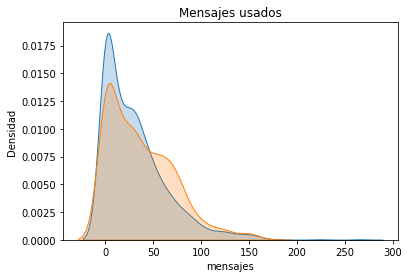

In [58]:
df_menssages_surf = mrg_tar [mrg_tar['plan']=='surf']['mensajes'].reset_index(drop=True)
sns.kdeplot(df_menssages_surf, shade = True)

df_menssages_ultimate = mrg_tar [mrg_tar['plan']=='ultimate']['mensajes'].reset_index(drop=True)
sns.kdeplot(df_menssages_ultimate, shade = True)

plt.title  ('Mensajes usados')
plt.xlabel  ('mensajes')
plt.ylabel ('Densidad')
plt.legend = (['surf', 'ultimate'])



In [59]:
# Cálculo de estadísticos del número de mensajes que tienden a enviar cada mes los usuarios del plan surf.

print ('La media del número de mensajes mensual del plan surf:', df_menssages_surf.mean())
print('La mediana del número de mensajes mensual del plan surf es igual a', df_menssages_surf.median())
print('La moda del número de mensajes mensual del plan surf es igual a',sta.mode(df_menssages_surf))
print ('La varianza del número de mensajes mensual del plan surf:', np.var(df_menssages_surf))
print('La desviación estandar del número de mensajes mensual del plan surf es igual a', np.std(df_menssages_surf))

La media del número de mensajes mensual del plan surf: 31.041165294490185
La mediana del número de mensajes mensual del plan surf es igual a 24.0
La moda del número de mensajes mensual del plan surf es igual a 0.0
La varianza del número de mensajes mensual del plan surf: 1125.404891865648
La desviación estandar del número de mensajes mensual del plan surf es igual a 33.547054891087654


In [60]:
# Cálculo de estadísticos del número de mensajes que tienden a enviar cada mes los usuarios del plan ultimate.

print ('La media del número de mensajes mensual del plan ultimate:', df_menssages_ultimate.mean())
print('La mediana del número de mensajes mensual del plan ultimate es igual a', df_menssages_ultimate.median())
print('La moda del número de mensajes mensual del plan ultimate es igual a',sta.mode(df_menssages_ultimate))
print ('La varianza del número de mensajes mensual del plan ultimate:', np.var(df_menssages_ultimate))
print('La desviación estandar del número de mensajes mensual del plan ultimate es igual a', np.std(df_menssages_ultimate))

La media del número de mensajes mensual del plan ultimate: 37.3439226519337
La mediana del número de mensajes mensual del plan ultimate es igual a 30.0
La moda del número de mensajes mensual del plan ultimate es igual a 0.0
La varianza del número de mensajes mensual del plan ultimate: 1208.15657908794
La desviación estandar del número de mensajes mensual del plan ultimate es igual a 34.758546849486386


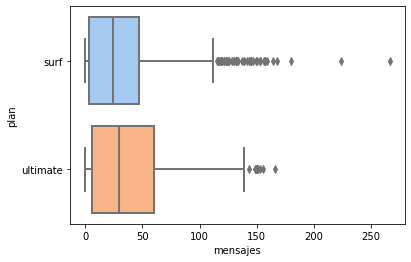

count    1579.000000
mean       31.041165
std        33.557683
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: mensajes, dtype: float64

count    724.000000
mean      37.343923
std       34.782576
min        0.000000
25%        6.000000
50%       30.000000
75%       60.250000
max      166.000000
Name: mensajes, dtype: float64

In [61]:
sns.boxplot(x = 'mensajes', y ='plan', data = mrg_tar, order = ['surf', 'ultimate'], palette= 'pastel', saturation = 0.9, fliersize = 5 , linewidth = 2)

plt.show()

display (df_menssages_surf.describe())
display (df_menssages_ultimate.describe())

In [62]:
# Calculo del rango intercuartil para el número de mensajes que tienden a enviar cada mes los usuarios del plan surf.
q1 = np.percentile(df_menssages_surf, 25)
q3 = np.percentile(df_menssages_surf, 75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)
print (' Atipico inferior', (q1 - 1.5 * iqr))
print (' Atipico superior', (q3 + 1.5 * iqr))

Interquartile Range (IQR): 44.0
 Atipico inferior -63.0
 Atipico superior 113.0


In [63]:
# Calculo del rango intercuartil para el número de mensajes que tienden a enviar cada mes los usuarios del plan ultimate.
q1 = np.percentile(df_menssages_ultimate, 25)
q3 = np.percentile(df_menssages_ultimate, 75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)
print (' Atipico inferior', (q1 - 1.5 * iqr))
print (' Atipico superior', (q3 + 1.5 * iqr))

Interquartile Range (IQR): 54.25
 Atipico inferior -75.375
 Atipico superior 141.625


El consumo promedio de mensajes muestra diferencias entre los planes, las cuales pueden deberse a la cantidad de mensajes incluidos en cada plan.

Para el plan surf los valores atipicos se presentan en número de mesajes mayores a 113, y en el plan ultimate estos se presentan en cantidad de mansajes mayores a 141. En ambos casos los valores atipicos mínimos son menores a 0, lo cual no es posible.

### Internet

plan,surf,ultimate
month,,
1.0,5.000000,7.250000
2.0,12.222222,17.285714
3.0,13.565217,18.416667
4.0,12.220000,16.333333
5.0,14.116883,16.862069
6.0,15.484536,15.425532
7.0,16.876033,16.491525
8.0,16.882716,17.845070
9.0,16.690722,17.011628


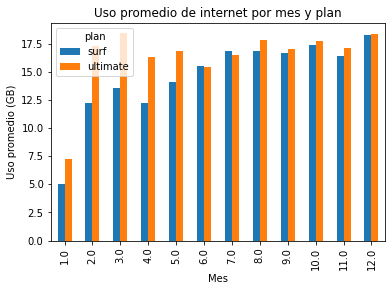

In [64]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
df_internet_used_avg = mrg_tar.pivot_table(index = 'month', 
                                                   columns = 'plan',
                                                   values = 'gb_used_rup',
                                                   aggfunc = 'mean')
display (df_internet_used_avg)

df_internet_used_avg.plot(kind='bar', 
                           title = 'Uso promedio de internet por mes y plan', 
                           xlabel = 'Mes', 
                           ylabel = 'Uso promedio (GB)'
                          )
plt.show()


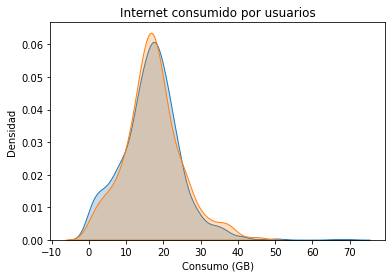

In [65]:
# Histograma de consumo de internet
df_internet_used_surf = mrg_tar [mrg_tar['plan']=='surf']['gb_used_rup'].reset_index(drop=True)
sns.kdeplot(df_internet_used_surf, shade = True)

df_internet_used_ultimate = mrg_tar [mrg_tar['plan']=='ultimate']['gb_used_rup'].reset_index(drop=True)
sns.kdeplot(df_internet_used_ultimate, shade = True)

plt.title  ('Internet consumido por usuarios')
plt.xlabel  ('Consumo (GB)')
plt.ylabel ('Densidad')
plt.legend = (['surf', 'ultimate'])

In [66]:
# Cálculo de estadísticos de la cantidad de tráfico de Internet consumido por usuarios por plan surf.

print ('La media del consumo mensual de internet del plan surf:', df_internet_used_surf.mean())
print('La mediana del consumo mensual de internet del plan surf es igual a', df_internet_used_surf.median())
print('La moda del consumo mensual de internet del plan surf es igual a',sta.mode(df_internet_used_surf))
print ('La varianza consumo mensual de internet del plan surf:', np.var(df_internet_used_surf))
print('La desviación estandar del consumo mensual de internet del plan surf es igual a', np.std(df_internet_used_surf))

La media del consumo mensual de internet del plan surf: 16.60734642178594
La mediana del consumo mensual de internet del plan surf es igual a 17.0
La moda del consumo mensual de internet del plan surf es igual a 18.0
La varianza consumo mensual de internet del plan surf: 62.36260594142324
La desviación estandar del consumo mensual de internet del plan surf es igual a 7.896999806345651


In [67]:
# Cálculo de estadísticos de la cantidad de tráfico de Internet consumido por usuarios por plan ultimate.

print ('La media del consumo mensual de internet del plan ultimate:', df_internet_used_ultimate.mean())
print('La mediana del consumo mensual de internet del plan ultimate es igual a', df_internet_used_ultimate.median())
print('La moda del consumo mensual de internet del plan ultimate es igual a',sta.mode(df_internet_used_ultimate))
print ('La varianza consumo mensual de internet del plan ultimate:', np.var(df_internet_used_ultimate))
print('La desviación estandar del consumo mensual de internet del plan ultimate es igual a', np.std(df_internet_used_ultimate))

La media del consumo mensual de internet del plan ultimate: 17.21132596685083
La mediana del consumo mensual de internet del plan ultimate es igual a 17.0
La moda del consumo mensual de internet del plan ultimate es igual a 17.0
La varianza consumo mensual de internet del plan ultimate: 60.06998221971246
La desviación estandar del consumo mensual de internet del plan ultimate es igual a 7.750482708819655


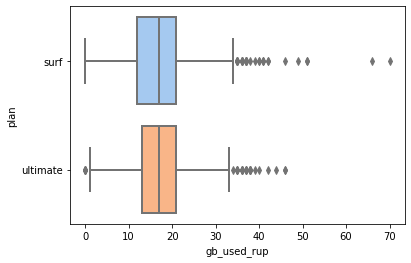

count    1579.000000
mean       16.607346
std         7.899502
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used_rup, dtype: float64

count    724.000000
mean      17.211326
std        7.755841
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used_rup, dtype: float64

In [68]:
# Boxplot del uso de internet
sns.boxplot(x = 'gb_used_rup', y ='plan', data = mrg_tar, order = ['surf', 'ultimate'], palette= 'pastel', saturation = 0.9, fliersize = 5 , linewidth = 2)

plt.show()
display (df_internet_used_surf.describe())
display (df_internet_used_ultimate.describe())

In [69]:
# Calculo del rango intercuartil para el uso de internet mensual de los usuarios del plan surf.
q1 = np.percentile(df_internet_used_surf, 25)
q3 = np.percentile(df_internet_used_surf, 75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)
print (' Atipico inferior', (q1 - 1.5 * iqr))
print (' Atipico superior', (q3 + 1.5 * iqr))

Interquartile Range (IQR): 9.0
 Atipico inferior -1.5
 Atipico superior 34.5


In [70]:
# Calculo del rango intercuartil para el uso de internet mensual de los  usuarios del plan ultimate.
q1 = np.percentile(df_internet_used_ultimate, 25)
q3 = np.percentile(df_internet_used_ultimate, 75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)
print (' Atipico inferior', (q1 - 1.5 * iqr))
print (' Atipico superior', (q3 + 1.5 * iqr))

Interquartile Range (IQR): 8.0
 Atipico inferior 1.0
 Atipico superior 33.0


El consumo promedio de internet en ambos planes es muy similar.

Para el plan surf los valores atipicos se presentan en consumos mayores a 34.5 gb y menores a 0 gb, lo cual no es posible. En el plan ultimate estos se presentan en consumos mayores a 33 gb y menores a 1 gb.

## Ingreso

In [71]:
df_mrg_tar_avg = mrg_tar.pivot_table(index = 'month', 
                                     columns = 'plan', 
                                     values = ['usd_tar', 'mensajes', 'min_roundup', 'gb_used_rup']
                                     aggfunc = 'mean')
display(df_mrg_tar_avg)

SyntaxError: invalid syntax (3186764929.py, line 4)

plan,surf,ultimate
month,,
1.0,20.000000,70.000000
2.0,34.256733,70.000000
3.0,45.790261,74.666667
4.0,40.454700,73.000000
5.0,47.235155,70.724138
6.0,48.930735,71.638298
7.0,62.221942,71.898305
8.0,63.572562,72.859155
9.0,57.948540,72.034884


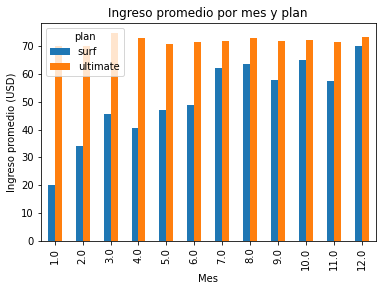

In [72]:
# Compara el ingreso promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_ingreso_avg = mrg_tar.pivot_table(index = 'month', 
                                     columns = 'plan',
                                     values = 'usd_tar',
                                     aggfunc = 'mean')
display (df_ingreso_avg)

df_ingreso_avg.plot(kind='bar', 
                           title = 'Ingreso promedio por mes y plan', 
                           xlabel = 'Mes', 
                           ylabel = 'Ingreso promedio (USD)'
                          )
plt.show()

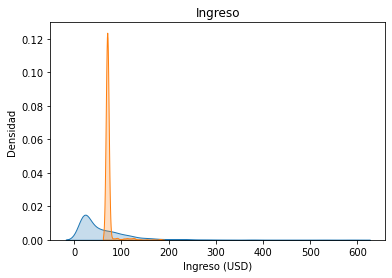

In [73]:
# Compara el ingreso mensuales de los usuarios de cada plan. Traza un histograma.
df_ingreso_surf = mrg_tar [mrg_tar['plan']=='surf']['usd_tar'].reset_index(drop=True)
sns.kdeplot(df_ingreso_surf, shade = True)

df_ingreso_ultimate = mrg_tar [mrg_tar['plan']=='ultimate']['usd_tar'].reset_index(drop=True)
sns.kdeplot(df_ingreso_ultimate, shade = True)

plt.title  ('Ingreso')
plt.xlabel  ('Ingreso (USD)')
plt.ylabel ('Densidad')
plt.legend = (['surf', 'ultimate'])

In [74]:
# Cálculo de los estadísticos sobre el ingreso mensual de los usuarios del plan surf.

print ('La media del ingreso mensual de los usuarios del plan surf:', df_ingreso_surf.mean())
print('La mediana del ingreso mensual de los usuarios del plan surf es igual a', df_ingreso_surf.median())
print('La moda del ingreso mensual de los usuarios del plan surf es igual a',sta.mode(df_ingreso_surf))
print ('La varianza del ingreso mensual de los usuarios del plan surf:', np.var(df_ingreso_surf))
print('La desviación estandar del ingreso mensual de los usuarios del plan surf es igual a', np.std(df_ingreso_surf))

La media del ingreso mensual de los usuarios del plan surf: 60.17410740975301
La mediana del ingreso mensual de los usuarios del plan surf es igual a 40.0
La moda del ingreso mensual de los usuarios del plan surf es igual a 20.0
La varianza del ingreso mensual de los usuarios del plan surf: 3046.5729464586843
La desviación estandar del ingreso mensual de los usuarios del plan surf es igual a 55.19576928043203


In [75]:
# Cálculo de los estadísticos sobre el ingreso mensual de los usuarios del plan ultimate.

print ('La media del ingreso mensual de los usuarios del plan ultimate:', df_ingreso_ultimate.mean())
print('La mediana del ingreso mensual de los usuarios del plan ultimate es igual a', df_ingreso_ultimate.median())
print('La moda del ingreso mensual de los usuarios del plan ultimate es igual a',sta.mode(df_ingreso_ultimate))
print ('La varianza del ingreso mensual de los usuarios del plan ultimate:', np.var(df_ingreso_ultimate))
print('La desviación estandar del ingreso mensual de los usuarios del plan ultimate es igual a', np.std(df_ingreso_ultimate))

La media del ingreso mensual de los usuarios del plan ultimate: 72.3011049723757
La mediana del ingreso mensual de los usuarios del plan ultimate es igual a 70.0
La moda del ingreso mensual de los usuarios del plan ultimate es igual a 70.0
La varianza del ingreso mensual de los usuarios del plan ultimate: 128.98115900003052
La desviación estandar del ingreso mensual de los usuarios del plan ultimate es igual a 11.356987232537973


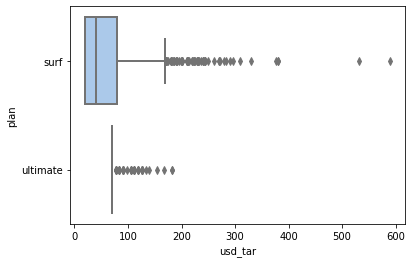

count    1579.000000
mean       60.174107
std        55.213256
min        20.000000
25%        20.000000
50%        40.000000
75%        80.000000
max       588.637200
Name: usd_tar, dtype: float64

count    724.000000
mean      72.301105
std       11.364839
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: usd_tar, dtype: float64

In [76]:
# Traza un diagrama de caja para visualizar la distribución del ingreso mensual
sns.boxplot(x = 'usd_tar', y ='plan', data = mrg_tar, order = ['surf', 'ultimate'], palette= 'pastel', fliersize = 5 , linewidth = 2)

plt.show()
display (df_ingreso_surf.describe())
display (df_ingreso_ultimate.describe())

In [77]:
# Calculo del rango intercuartil sobre el ingreso mensual de los usuarios del plan surf.
q1 = np.percentile(df_ingreso_surf, 25)
q3 = np.percentile(df_ingreso_surf, 75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)
print (' Atipico inferior', (q1 - 1.5 * iqr))
print (' Atipico superior', (q3 + 1.5 * iqr))

Interquartile Range (IQR): 60.0
 Atipico inferior -70.0
 Atipico superior 170.0


In [78]:
# Calculo del rango intercuartil sobre el ingreso mensual de los usuarios del plan ultimate.
q1 = np.percentile(df_ingreso_ultimate, 25)
q3 = np.percentile(df_ingreso_ultimate, 75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)
print (' Atipico inferior', (q1 - 1.5 * iqr))
print (' Atipico superior', (q3 + 1.5 * iqr))

Interquartile Range (IQR): 0.0
 Atipico inferior 70.0
 Atipico superior 70.0


Se puede observar que el ingreso generado en el plan surf tiene una mayor dispersión, esto indica que la mayoria de los usuarios tiene consumos adicionales a lo incluido en el plan, generando ingresos adicionales. Por el contrario, para el plan ultimate el 75% de los usurios solo consumen lo que incluye el plan.

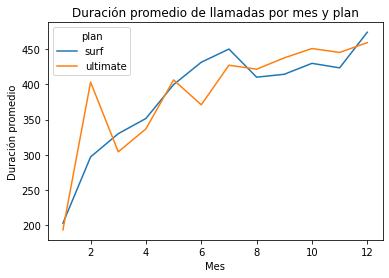

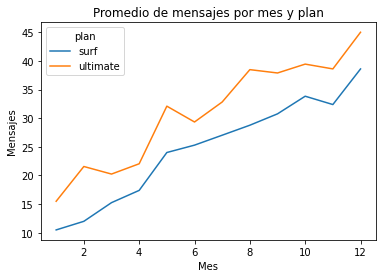

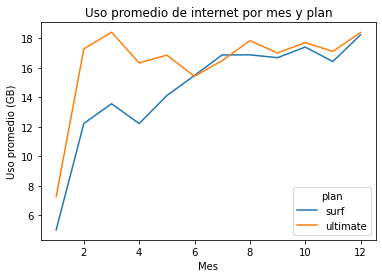

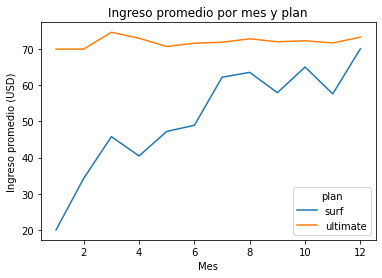

In [87]:
df_calls_duration_avg.plot(kind='line', 
                           title = 'Duración promedio de llamadas por mes y plan', 
                           xlabel = 'Mes', 
                           ylabel = 'Duración promedio'
                          )
df_menssages_avg.plot(kind='line', 
                           title = 'Promedio de mensajes por mes y plan', 
                           xlabel = 'Mes', 
                           ylabel = 'Mensajes'
                          )
df_internet_used_avg.plot(kind='line', 
                           title = 'Uso promedio de internet por mes y plan', 
                           xlabel = 'Mes', 
                           ylabel = 'Uso promedio (GB)'
                          )
df_ingreso_avg.plot(kind='line', 
                           title = 'Ingreso promedio por mes y plan', 
                           xlabel = 'Mes', 
                           ylabel = 'Ingreso promedio (USD)'
                          )

plt.show()

El aumento en el ingreso generado en el plan surf es congruente con el consumo de los servicios, se puede observar que estos aumentan conforme pasan los meses. Por otro lado en el paln ultimate, aunque los consumos en mensajes y tiemo de llamadas aumentan, el consumo de internet y el ingreso generado por este plan muestran una tendencia a mantenerse en el mismo rango. 

## Prueba las hipótesis estadísticas

### Ingresos promedio de los usuarios por plan

Ho = Los ingresos promedio procedentes de los usuarios del plan Surf son iguales a los ingresos promedio precedentes de los usuarios del plan Ultimate.

Ha = Los ingresos promedio procedentes de los usuarios del plan Surf no son iguales a los ingresos promedio precedentes de los usuarios del plan Ultimate.

La prueba estadística que usare es hipótesis sobre la igualdad de las medias de dos poblaciones.

El valor alpha sera de 0.05

In [80]:
# Prueba las hipótesis

alpha = 0.05

results = st.ttest_ind(df_ingreso_surf, df_ingreso_ultimate, equal_var=False)

print('valor p: ', results.pvalue)

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  1.3155784050677217e-16
Rechazamos la hipótesis nula


In [81]:
alpha = 0.05

results = st.ttest_ind(df_ingreso_surf, df_ingreso_ultimate, equal_var=True)

print('valor p: ', results.pvalue)

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  5.528829927269798e-09
Rechazamos la hipótesis nula


<div class="alert alert-block alert-warning">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Cuando realizamos la prueba de t.estudent es muy importante un parametro que es el equal_var (False or True), que significa si existe la igualdad de varianzas o no de ambas muestras. En este trabajo no pedimos ser finos con esto pero te lo dejo a modo de que entiendas el porque y te va a servir en futuros proyecto.

El bojetivo de la prueba de t de Student es comparar las medias de dos grupos de datos y determinar si existen diferencias significativas entre ellos. Se aplica cuando estamos interesados en saber si la diferencia entre las medias es real o simplemente producto del azar.

Para esto generamos dos hipotesis H0 y H1 (nula y alternativa, respectivamente).

Hipótesis nula (H0): No hay diferencia significativa entre las medias de los dos grupos.
Hipótesis alternativa (H1): Hay una diferencia significativa entre las medias de los dos grupos.

ELas pruebas estadísticas están diseñadas para tomar en cuenta el tamaño de la muestra y calcular si la diferencia observada en las varianzas es estadísticamente significativa o si podría deberse al azar.

Para saber lo del equal_var utilizamos La función levene en scipy.stats que se utiliza para realizar una prueba de igualdad de varianzas entre dos grupos de datos. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

Los resultados  de esta prueba es muy parecido a lo que hacemos en el t.student. Ya que Si el valor p obtenido en la prueba levene es mayor que un nivel de significancia (alpha) previamente elegido (por ejemplo, 0.05), entonces asumimos que las varianzas son iguales (aceptamos H0).
Si el valor p es menor que alpha, rechazamos la hipótesis nula y asumimos que las varianzas son diferentes.

Por lo tanto, si las varianzas son iguales (aceptamos H0 en la prueba levene), puedes establecer equal_var=True al realizar la prueba t de Student.
Si las varianzas son diferentes (rechazamos H0 en la prueba levene), debes establecer equal_var=False al realizar la prueba t de Student. Esto indica que se debe usar una versión de la prueba t que no asuma igualdad de varianzas, como la prueba Welch's t.

Siempre recordar que los outliers pueden impactar negativamente en esta prueba (t.student)

Esto es basicamente por lo que te corrijo lo del equal_var pero es como consejo y que lo sepas a futuro. Esta en vos si lo queres modificar o no.

</div>

De acuerdo a la prueba de hipótesis realizada, el ingreso promedio procedente de los usuarios del plan sur y del paln ultimate no son iguales.

### Ingresos promedio de los usuarios por área

Ho = Los ingresos promedio procedentes de los usuarios del área de NY/NJ son iguales a los ingresos promedio precedentes de los usuarios de otras regiomes.

Ha = Los ingresos promedio procedentes de los usuarios del área de NY/NJ no son iguales a los ingresos promedio precedentes de los usuarios de otras regiones.

La prueba estadística que usare es hipótesis sobre la igualdad de las medias de dos poblaciones.

El valor alpha sera de 0.05

Para realizar la prueba de hipótesis primero se agrupa el dataframe por áreas (NY/NJ y el resto del país), posteriormente se obtienen los estadísticos gemerales y se grafica el ingreso promedio de cada una de las áreas. Finalmente se realiza la purba de hipótesis.

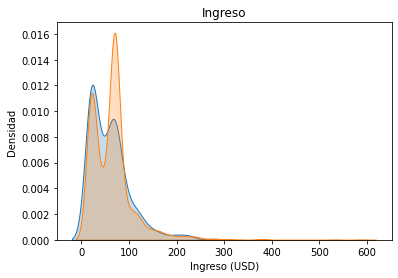

In [82]:
# Agrupacion por zonas
df_ingreso_NY_NJ = mrg_tar[mrg_tar['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['usd_tar'].reset_index(drop = True)
sns.kdeplot(df_ingreso_NY_NJ, shade = True)

df_ingreso_other_city = mrg_tar [mrg_tar['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['usd_tar'].reset_index(drop=True)
sns.kdeplot(df_ingreso_other_city, shade = True)

plt.title  ('Ingreso')
plt.xlabel  ('Ingreso (USD)')
plt.ylabel ('Densidad')
plt.legend = (['NY-NJ', 'other'])

In [83]:
# Prueba las hipótesis
alpha = 0.05

results = st.ttest_ind(df_ingreso_NY_NJ, df_ingreso_other_city, equal_var=False)

print('valor p: ', results.pvalue)

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.03607753502263241
Rechazamos la hipótesis nula


In [84]:
alpha = 0.05

results = st.ttest_ind(df_ingreso_NY_NJ, df_ingreso_other_city, equal_var=True)

print('valor p: ', results.pvalue)

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.046579833893291386
Rechazamos la hipótesis nula


Conforme a los resultados obtenidos en la prueba de hiótesis y lo observado en el gráfico precedente, se puede decir que los ingresos promedio procedentes de los usuarios del área de NY/NJ no son iguales a los ingresos promedio precedentes de los usuarios de otras regiones.

## Conclusión general

Para este proyecto se realiza la carga de las librerias y la importación de los dataframes proporcionados para el procesamiento de datos, posteriormente se revisa que los dataframes estan en el formato adecuado para su manejo, cada dataframe es cargado de forma independiente. Se despliega información y estadísticos generales, así como una muestra de los datos en bussca de inconsistencias, valores ausentes o duplicados. Para el caso de los valores ausentes en la fecha de cancelación de cambian por 'Active'.

Las columnas que contienen fechas en cada dataframe son cambiadas de dtipe a 'datetime' para poder extraer el mes de consumo, el cual se coloca en una columna llamada 'month', tambien se agregaron las columnas 'duration_roundup' que contiene el tiempo de las llamadas redondeado y 'gb_used' que muestra los gb usados en cada sesión de internet.

Cada uno de los dataframes se agrupan por usuario y mes usando .groupby() debido a que se deben calcular los ingresos mensuales por usuario, se agrega la columna 'gb_used_rup' que contiene el consumo de gb mensual redondeado. Posteriormente se compilan estos dataframes en uno nuevo llamado 'df_comp', este es el que se usa para calcular los ingresos y consumos de los usuarios y de cada plan.
Para los casos que no muestran informacion de consumo y que los usuarios aun tienen activos los planes, se reemplazan los valores ausentes con 0, así se podran calcular los ingresos precedentes de esos usuarios.

Para el calculo de los ingresos mensuales por usurio se resta el consumo del usuario del limite que ofrece el plan, se asigna el valor mínimo en 0, se multiplica el consumo excedente por la tarifa correspondiente, se suma a la tarifa base los consumos adicionales que se hayan realizado.

Se calculan los promedios mensuales de duracion de llamadas, mensajes, consumo de internet e ingresos, así como sus  medias y varianzas, se grafican los resultados usando gráficos de barras, histograma -dispersión- y boxplot (dependiendo del caso).

Para las prebas de hipotesis se reliza una preba de igualdad de la media de dos poblaciones, ya que la información no tiene dependencia.


Resultados:

Para los promedios mensuales de duracion de llamadas, mensajes, consumo de internet los estadisticos no muetran diferencias significativas, sin embargo en los ingresos provenientes de cada plan las diferencias son muy claras, los usurios del plan surf muetran una clara tendencia a consumir mas de los que su plan les ofrece, mientras que los usuarios del plan ultimate consumen lo que les ofrece su paln.

Las pruebas de hipótesis muestran que ios ingresos de cada plan no son iguales, y que los consunos en el área de NY-NJ difieren del consumo del resto del país.